In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Baca data dari file CSV
data = pd.read_csv('output.csv')

In [19]:
# Hitung error absolut
data['AbsoluteError'] = data['Error'].abs()

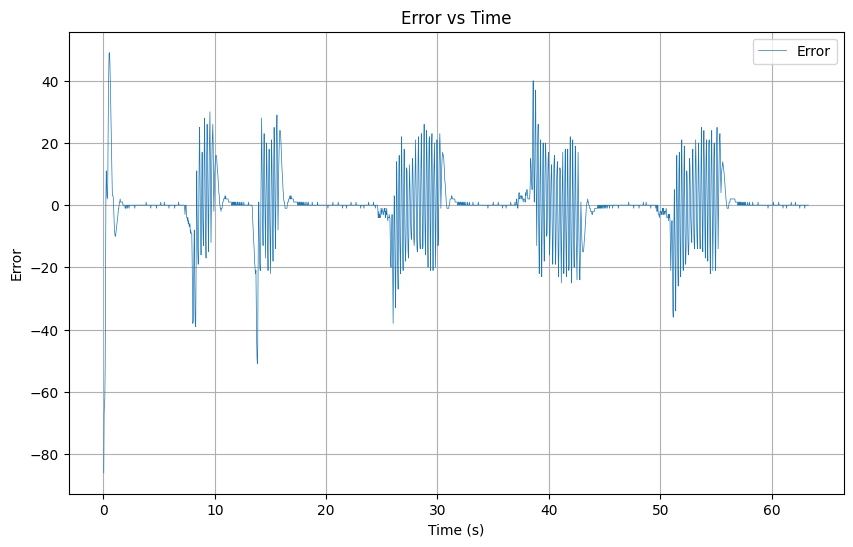

In [37]:
# Plot Error terhadap Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Error'], label='Error', linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Error vs Time')
plt.legend()
plt.grid()
plt.show()

In [21]:
# Analisis Transien Respon
set_point = 160

In [22]:
# Menemukan overshoot
max_error = data['Error'].max()
overshoot = ((max_error - set_point) / set_point) * 100

In [23]:
# Menemukan settling time (waktu stabilisasi)
threshold = 0.05 * set_point
settling_time = data.loc[data['AbsoluteError'] <= threshold, 'Time'].min()

In [24]:
# Menemukan rise time (waktu naik)
rise_time = data.loc[data['Error'] >= set_point, 'Time'].min()

In [25]:
# Menampilkan hasil analisis transien respon
print(f'Overshoot: {overshoot}%')
print(f'Settling Time: {settling_time} s')
print(f'Rise Time: {rise_time} s')

Overshoot: -69.375%
Settling Time: 0.224 s
Rise Time: nan s


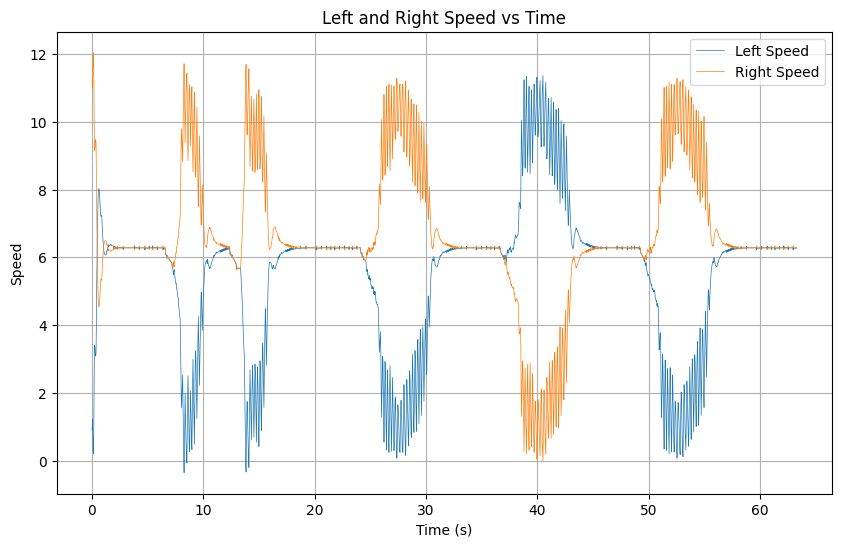

In [39]:
# Plot Kecepatan Kiri dan Kanan terhadap Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['LeftSpeed'], label='Left Speed', linewidth=0.5)
plt.plot(data['Time'], data['RightSpeed'], label='Right Speed', linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Speed')
plt.title('Left and Right Speed vs Time')
plt.legend()
plt.grid()
plt.show()

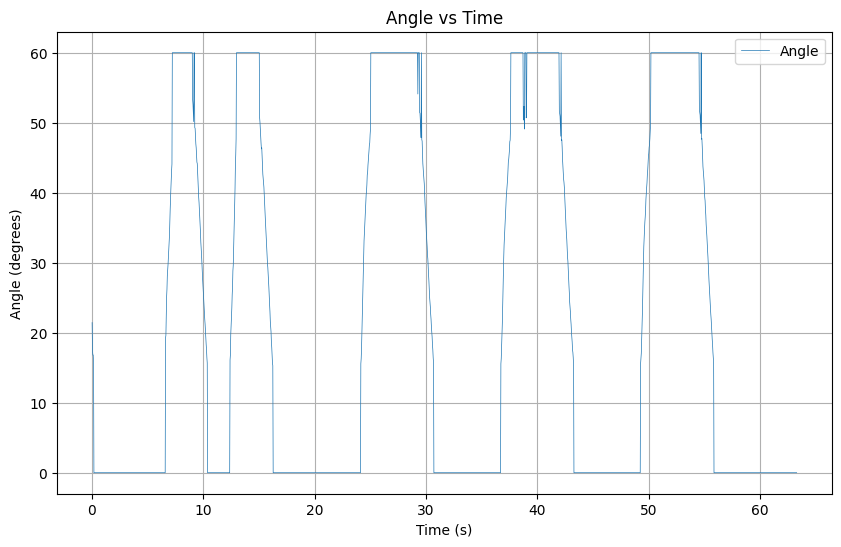

In [40]:
# Plot Sudut terhadap Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Angle'], label='Angle', linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Angle vs Time')
plt.legend()
plt.grid()
plt.show()

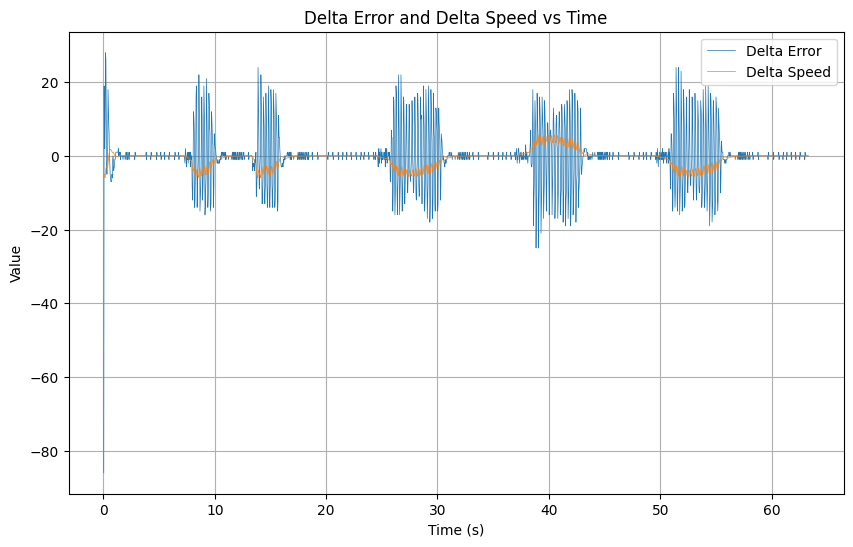

In [41]:
# Plot Delta Error dan Delta Speed terhadap Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['DeltaError'], label='Delta Error', linewidth=0.5)
plt.plot(data['Time'], data['DeltaSpeed'], label='Delta Speed', linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Delta Error and Delta Speed vs Time')
plt.legend()
plt.grid()
plt.show()

In [29]:
# Analisis tambahan
# Steady-State Error
steady_state_error = data['Error'].iloc[-1]
print(f'Steady-State Error: {steady_state_error}')

Steady-State Error: 0


In [30]:
# Control Effort Analysis
control_effort_left = data['LeftSpeed'].sum()
control_effort_right = data['RightSpeed'].sum()
print(f'Control Effort (Left): {control_effort_left}')
print(f'Control Effort (Right): {control_effort_right}')

Control Effort (Left): 10827.101379676073
Control Effort (Right): 13156.101379676073


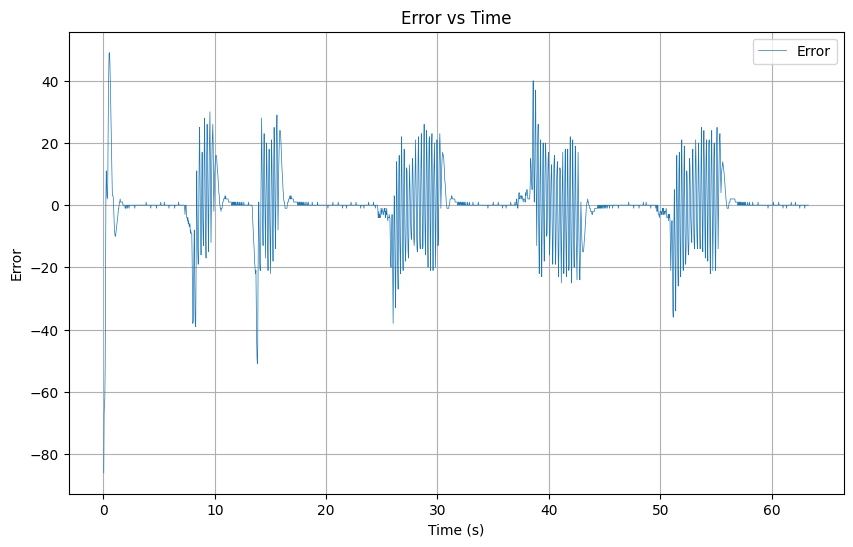

Overshoot: -69.375%
Settling Time: 0.224 s
Rise Time: nan s


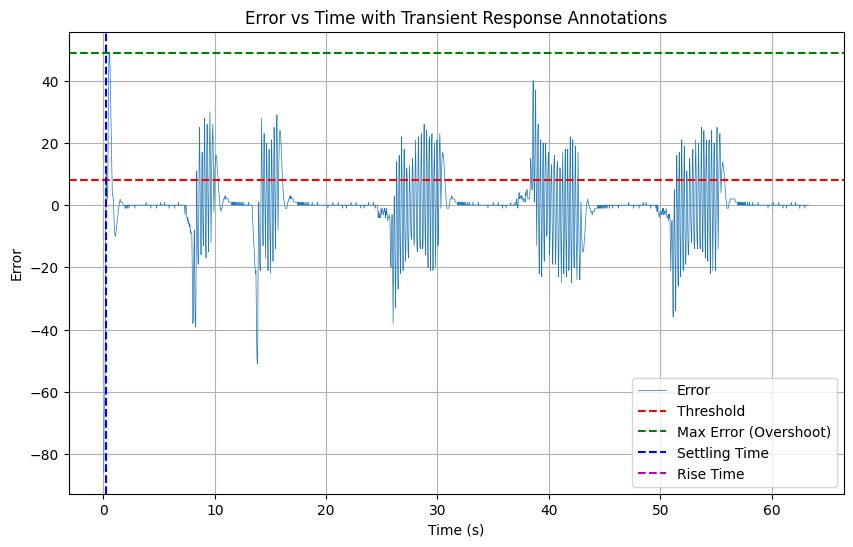

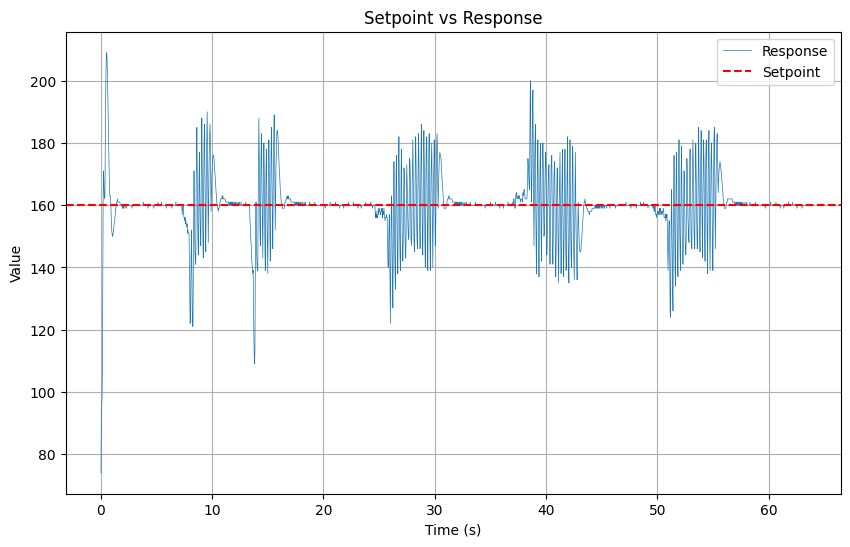

In [43]:
# Plot Error terhadap Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Error'], label='Error', linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Error vs Time')
plt.legend()
plt.grid()
plt.show()

# Analisis Transien Respon
set_point = 160

# Menemukan overshoot
max_error = data['Error'].max()
overshoot = ((max_error - set_point) / set_point) * 100

# Menemukan settling time (waktu stabilisasi)
threshold = 0.05 * set_point
settling_time = data.loc[data['AbsoluteError'] <= threshold, 'Time'].min()

# Menemukan rise time (waktu naik)
rise_time = data.loc[data['Error'] >= set_point, 'Time'].min()

# Menampilkan hasil analisis transien respon
print(f'Overshoot: {overshoot}%')
print(f'Settling Time: {settling_time} s')
print(f'Rise Time: {rise_time} s')

# Plot Error vs Time dengan anotasi untuk Overshoot, Settling Time, dan Rise Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Error'], label='Error', linewidth=0.5)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=max_error, color='g', linestyle='--', label='Max Error (Overshoot)')
plt.axvline(x=settling_time, color='b', linestyle='--', label='Settling Time')
plt.axvline(x=rise_time, color='m', linestyle='--', label='Rise Time')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Error vs Time with Transient Response Annotations')
plt.legend()
plt.grid()
plt.show()

# Plot Setpoint vs Response
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Error'] + set_point, label='Response', linewidth=0.5)
plt.axhline(y=set_point, color='r', linestyle='--', label='Setpoint')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Setpoint vs Response')
plt.legend()
plt.grid()
plt.show()

       Time  Error
309   9.920     -2
310   9.952      4
311   9.984      9
312  10.016     12
313  10.048     14
314  10.080     16
315  10.112     16
316  10.144     16
317  10.176     15
318  10.208     13
319  10.240     11
320  10.272     10
321  10.304      8
322  10.336      6
323  10.368      4
324  10.400      3
325  10.432      1
326  10.464      0
327  10.496     -1


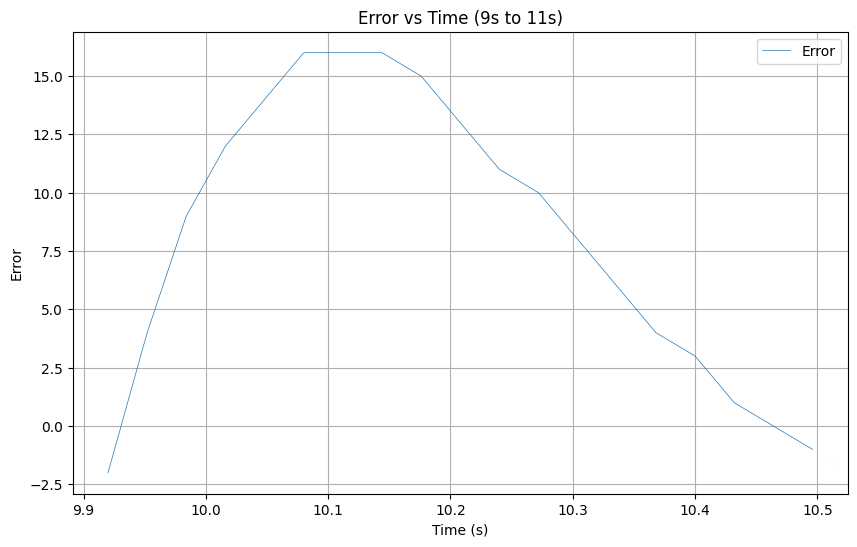

In [46]:
# Filter data untuk interval waktu dari detik ke-9 hingga ke-11
filtered_data = data[(data['Time'] >= 9.9) & (data['Time'] <= 10.5)]

# Tampilkan data error untuk interval waktu tersebut
print(filtered_data[['Time', 'Error']])

# Plot Error terhadap Time untuk interval waktu yang difilter
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Time'], filtered_data['Error'], label='Error', linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Error vs Time (9s to 11s)')
plt.legend()
plt.grid()
plt.show()

------------------------------------
# Tracking Line

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Baca data dari file CSV
file_path = 'output.csv'  # Ganti dengan path ke file CSV Anda
data = pd.read_csv(file_path)

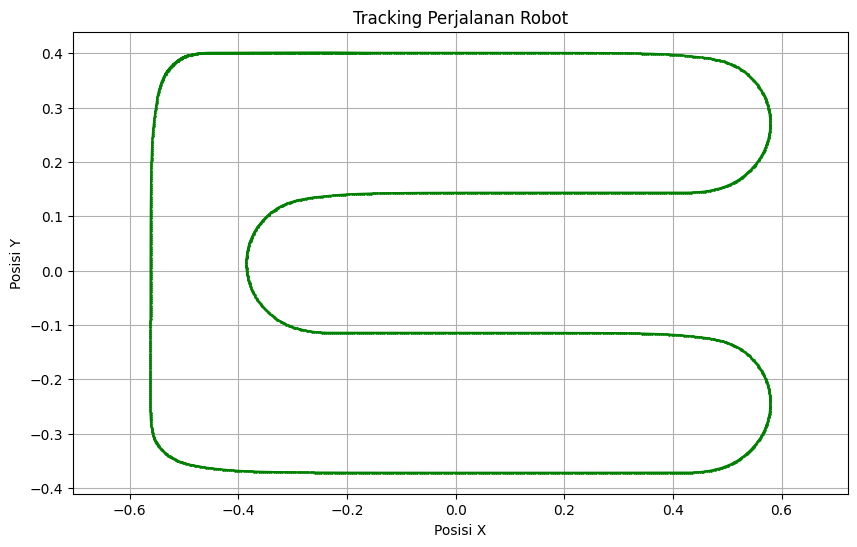

In [23]:
# Plot titik-titik X dan Y dengan garis tracking lebih tipis dan marker lebih kecil
plt.figure(figsize=(10, 6))
plt.plot(data['X'], data['Y'], marker='o', color='g', markersize=1)
plt.title('Tracking Perjalanan Robot')
plt.xlabel('Posisi X')
plt.ylabel('Posisi Y')
plt.grid(True)
plt.axis('equal')
plt.show()